<a href="https://colab.research.google.com/github/MudassirABBASSi/Computer-Vision/blob/main/Emotion_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#unzip the Dataset

In [ ]:
!unzip '/content/emotion dataset.zip'

# Importing the library

In [2]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np



# Loading the dataset

In [3]:
data = tf.keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    interpolation='nearest',
    batch_size=32,
    shuffle=True
)

Found 28709 files belonging to 7 classes.


In [4]:
test_data = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    image_size=(256, 256),
    interpolation='nearest',
    batch_size=32,
    shuffle=False # Usually shuffle is not needed for test data
)

Found 7178 files belonging to 7 classes.


In [5]:
class_name = data.class_names
class_name

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']

In [6]:
len(data)

898

# Checking the Size Of Image

In [12]:
for image_batch,label_batch in data.take(1):
  print(image_batch.shape)
  print(label_batch[0].numpy())

(32, 256, 256, 3)
3


In [13]:
for image_size,label in data.take(1):
  print(image_size)

tf.Tensor(
[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[226 226 226]
   [226 226 226]
   [226 226 226]
   ...
   [204 204 204]
   [204 204 204]
   [204 204 204]]

  [[226 226 226]
   [226 226 226]
   [226 226 226]
   ...
   [204 204 204]
   [204 204 204]
   [204 204 204]]

  [[226 226 226]
   [226 226 226]
   [226 226 226]
   ...
   [204 204 204]
   [204 204 204]


# View Image

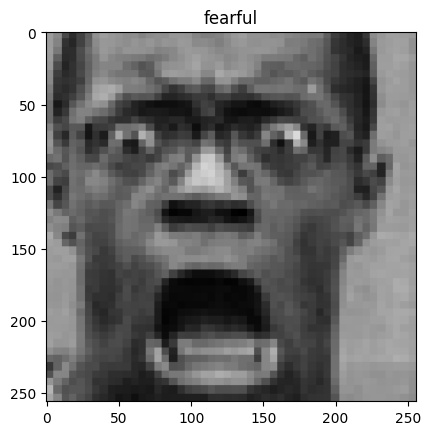

In [14]:
for image_batch,label in data.take(1):
  plt.imshow(image_batch[0].numpy().astype('uint8'))
  plt.title(class_name[label[0]])


#Spliting the model
test dataset will be for testing and the data veriabe converted in to train and validate data set
80% train and 20% validate

In [15]:
len(data)

898

In [16]:
899-718

181

#train dataSet

In [17]:
train_size = 0.8
len(data)*train_size
train_ds = data.take(718)

In [18]:
len(train_ds)

718

#Test Data Set

In [19]:
len(test_data)

225

In [20]:
test_ds = test_data
len(test_ds)

225

#Validate Data Set

In [21]:
val_ds = data.skip(718)
len(val_ds)
val_ds = data.take(180)
len(val_ds)

180

In [22]:
print(len(train_ds))
print(len(test_ds))
print(len(val_ds))

718
225
180


#Shuffling the data Set

In [23]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# Rescaling the images

In [24]:
IMAGE_SIZE = 256
resize_and_rescale = tf.keras.Sequential([
    tf.keras.layers.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    tf.keras.layers.Rescaling(1.0/255)
]
)

#Data Augmented

In [25]:
data_augmnet = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.2)
]
)

# CNN

In [26]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

In [27]:
model = models.Sequential([
    resize_and_rescale,
    data_augmnet,
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(n_classes,activation = 'softmax')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.build(input_shape = input_shape)

In [29]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 516128)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │    33,032,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,033,347 (126.01 MB)

 Trainable params: 33,033,347 (126.01 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [31]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=5,
)

Epoch 1/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.1392 - loss: nan - val_accuracy: 0.1431 - val_loss: nan
Epoch 2/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 33s 46ms/step - accuracy: 0.1396 - loss: nan - val_accuracy: 0.1431 - val_loss: nan
Epoch 3/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 32s 44ms/step - accuracy: 0.1397 - loss: nan - val_accuracy: 0.1431 - val_loss: nan
Epoch 4/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.1383 - loss: nan - val_accuracy: 0.1431 - val_loss: nan
Epoch 5/5
718/718 ━━━━━━━━━━━━━━━━━━━━ 32s 45ms/step - accuracy: 0.1368 - loss: nan - val_accuracy: 0.1431 - val_loss: nan


In [32]:
scores = model.evaluate(test_ds)

225/225 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.1557 - loss: nan


first image to predict
actual label: happy


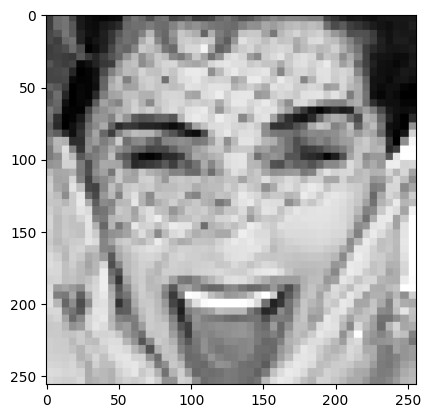

In [40]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_name[first_label])


First image actua Label: sad
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
happy


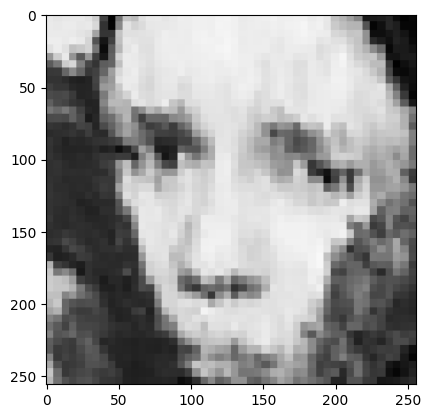

In [43]:
  for image_batch, labels_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()


    plt.imshow(first_image)
    print("First image actua Label:",class_name[first_label])
    batch_pre =model.predict(image_batch)
    print(class_name[np.argmax(batch_pre[0])])

In [44]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


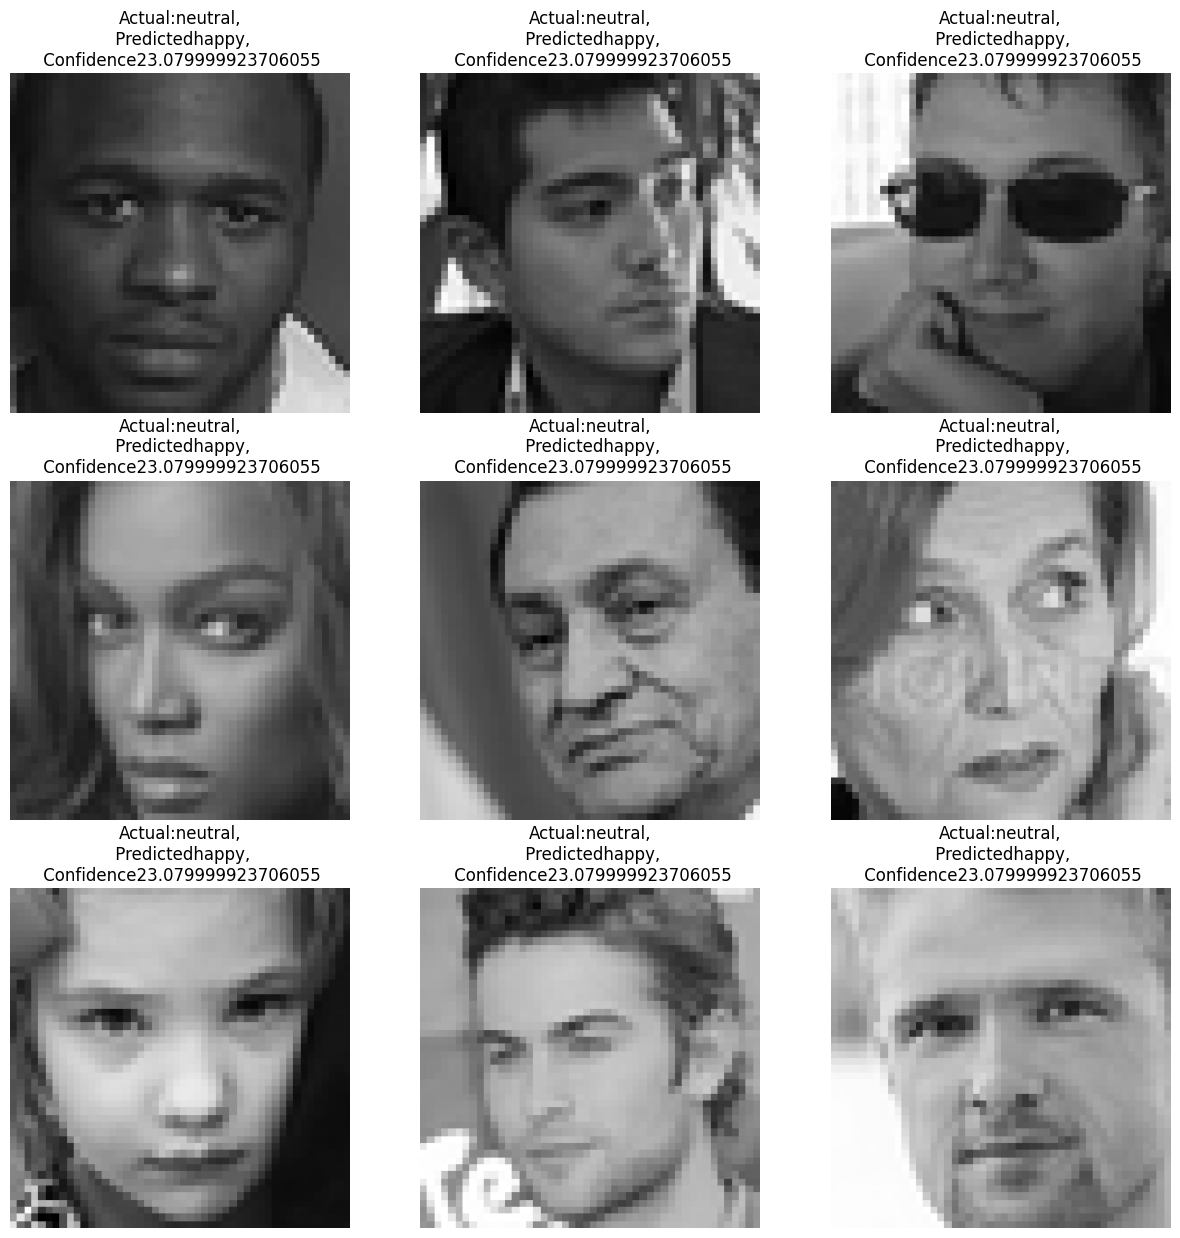

In [47]:
import matplotlib.pyplot as plt

for images, labels in test_ds.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))

        pre_class,confidence = predict(model,images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted{pre_class},\n Confidence{confidence}")
        plt.axis('off')


#Second Technique of work

# Spliting the data Set

In [23]:
train_size = int(len(data)*0.7)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

train_data = data.take(train_size)
val_data = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [24]:
train_data = train_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)
test_data = test_data.cache().prefetch(buffer_size=tf.data.AUTOTUNE)

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

model1 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(class_name), activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [ ]:
history = model1.fit(
    train_data,
    epochs=8, # You can adjust the number of epochs
    validation_data=val_data
)

Epoch 1/3
411/628 ━━━━━━━━━━━━━━━━━━━━ 13s 63ms/step - accuracy: 0.4814 - loss: 1.3265

In [34]:
scores = model1.evaluate(test)

89/89 ━━━━━━━━━━━━━━━━━━━━ 33s 45ms/step - accuracy: 0.2540 - loss: 3.6406


In [ ]:
  for image_batch, labels_batch in test_data.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()


    plt.imshow(first_image)
    print("First image actua Label:",class_name[first_label])
    batch_pre =model1.predict(image_batch)
    print(class_name[np.argmax(batch_pre[0])])

In [36]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model1.predict(img_array)

    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


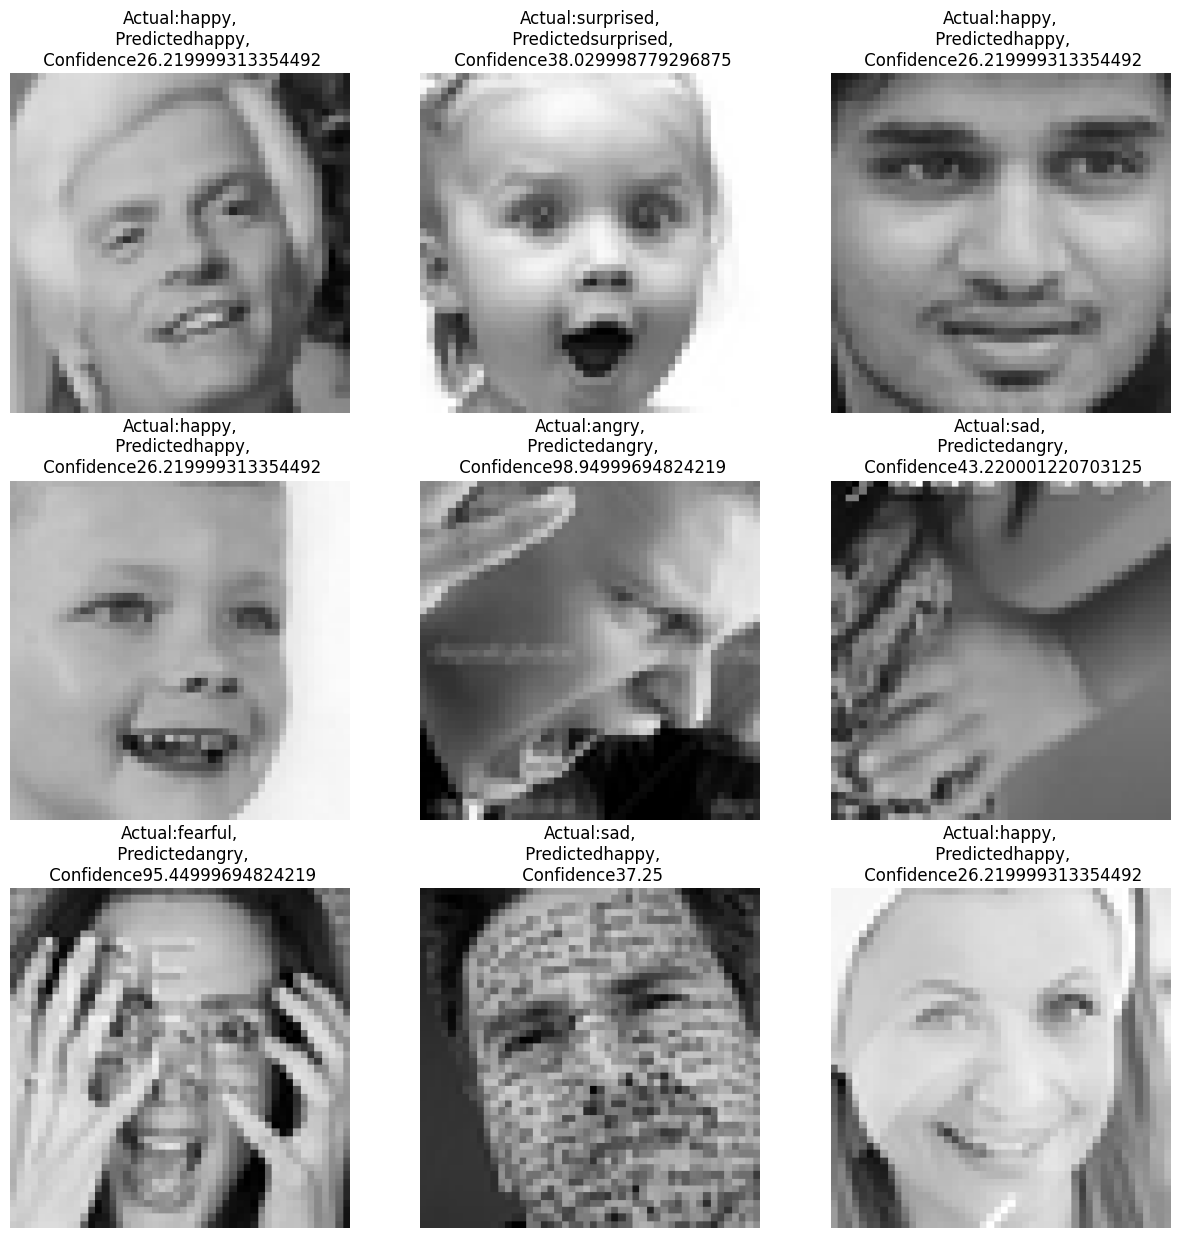

In [37]:
import matplotlib.pyplot as plt

for images, labels in test_data.take(1):
    plt.figure(figsize=(15, 15))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype('uint8'))

        pre_class,confidence = predict(model1,images[i].numpy())
        actual_class = class_name[labels[i]]
        plt.title(f"Actual:{actual_class},\n Predicted{pre_class},\n Confidence{confidence}")
        plt.axis('off')
